In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
df = pd.read_csv("C:\\Users\\Seijsener\\Ironhack\\unit2\\week_6\\mini_project\\fifa21_male2.csv", dtype={'Column78': str})

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_14624\3758959499.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\Seijsener\\Ironhack\\unit2\\week_6\\mini_project\\fifa21_male2.csv", dtype={'Column78': str})


In [11]:
df.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [12]:
df

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


# 1:Exploratory Data Analysis (EDA):

In [ ]:
#Examine basic statistics and distributions of key variables.

In [13]:
df.describe()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,...,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,...,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,...,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,...,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,...,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,306.000000,65.000000,64.000000,65.000000,...,14.000000,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,93.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


In [14]:
print(df.columns)

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [16]:
df.dtypes

ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

In [17]:
pd.set_option('display.max_columns', None)
print(df.head())

   ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/ligh

In [ ]:
#distribution of numerical features and summary statistics.

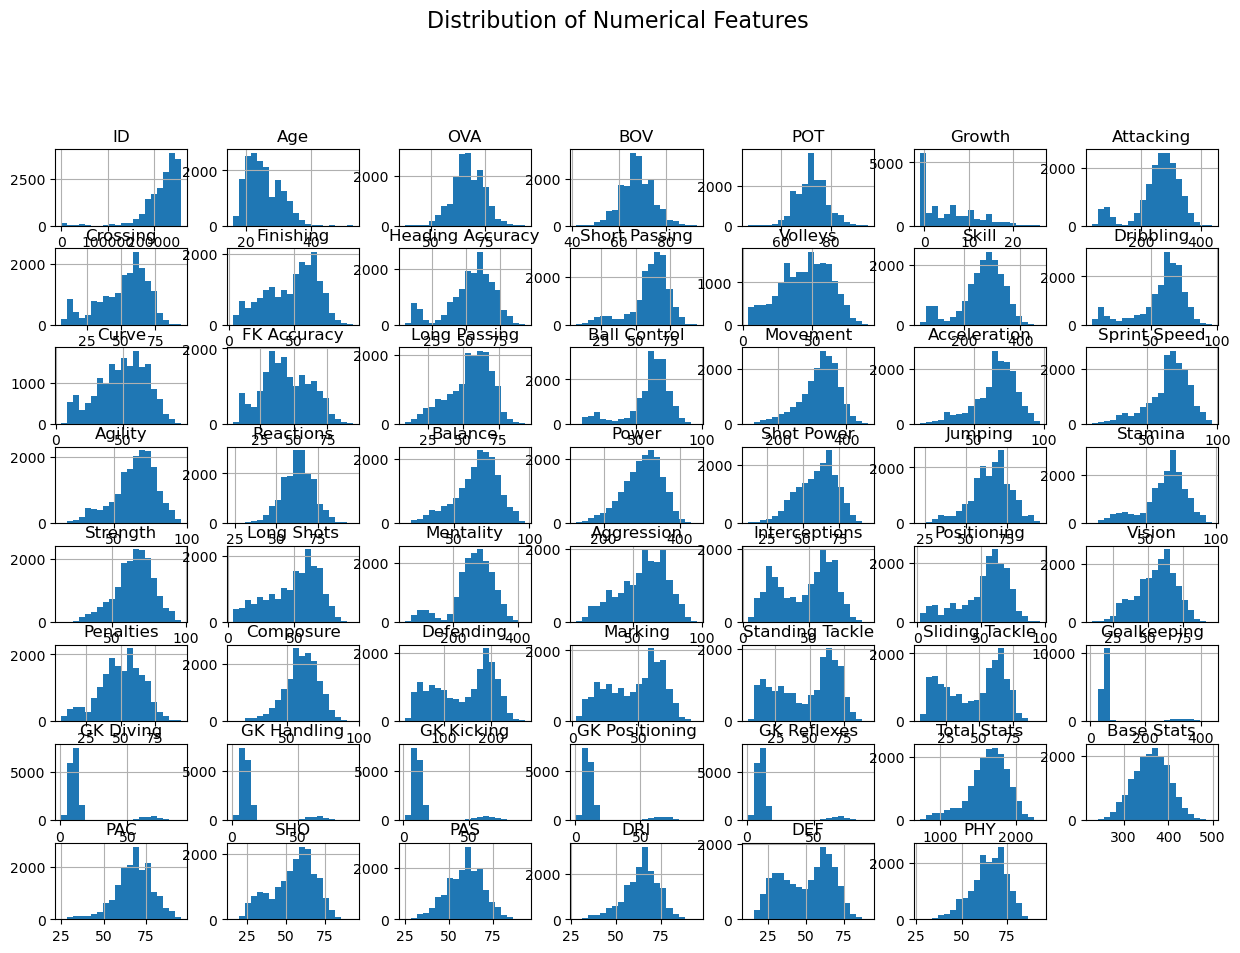

Summary Statistics:
                  ID           Age           OVA           BOV           POT  \
count   17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean   219388.716204     25.272934     66.965022     67.900204     72.489810   
std     37499.197507      4.942665      6.864329      6.637538      5.769949   
min         2.000000     16.000000     38.000000     42.000000     47.000000   
25%    204082.000000     21.000000     62.000000     64.000000     69.000000   
50%    228961.000000     25.000000     67.000000     68.000000     72.000000   
75%    243911.000000     29.000000     72.000000     72.000000     76.000000   
max    259105.000000     53.000000     93.000000     93.000000     95.000000   

             Growth     Attacking      Crossing     Finishing  \
count  17125.000000  17125.000000  17125.000000  17125.000000   
mean       5.524788    258.537752     51.621314     47.956672   
std        5.787539     72.255687     17.875715     19.391547   

In [21]:
summary_stats = df.describe()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', y=1.02, size=16)
plt.show()

print("Summary Statistics:")
print(summary_stats)

# 2:Data Cleaning:

In [22]:
df.isnull().sum()

ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 107, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [ ]:
# Check for and remove duplicate rows

In [24]:
df_cleaned = df.drop_duplicates()

In [25]:
print("Shape after removing duplicates:", df_cleaned.shape)

Shape after removing duplicates: (17125, 107)


In [ ]:
# Visualize missing data using a heatmap

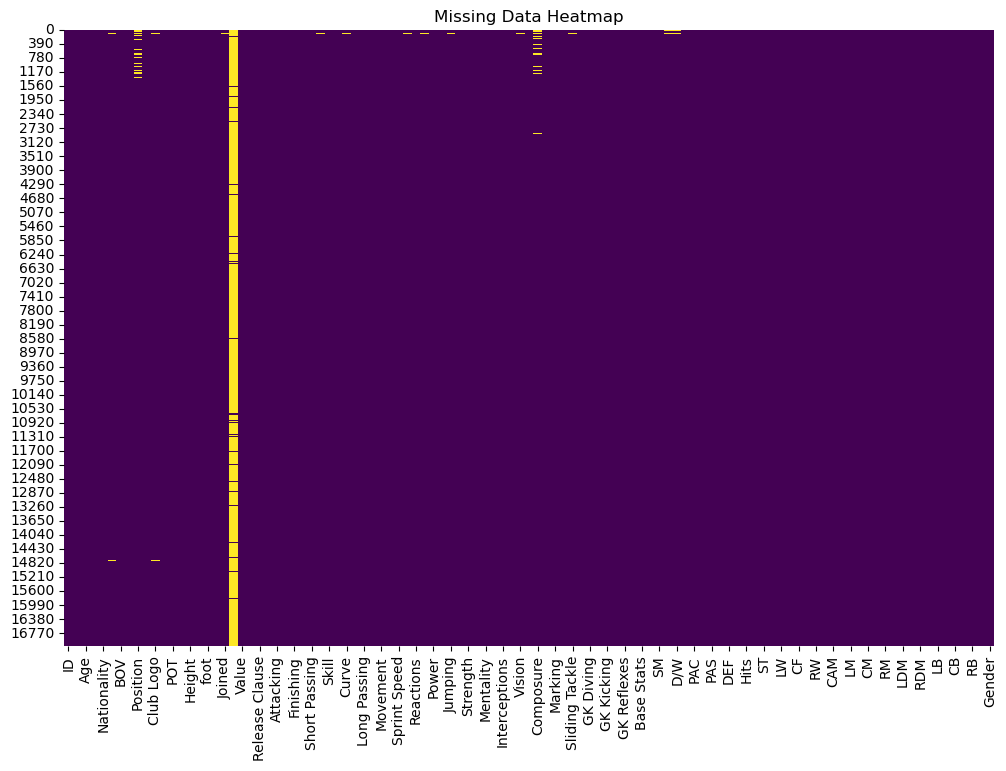

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
# Missing data summary

In [27]:
missing_data_summary = pd.DataFrame({
    'Total Missing': df_cleaned.isnull().sum(),
    'Percentage Missing': (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
})

In [ ]:
# Display the missing data summary

In [28]:
missing_data_summary = missing_data_summary[missing_data_summary['Total Missing'] > 0]
print("Missing Data Summary:")
print(missing_data_summary)

Missing Data Summary:
                Total Missing  Percentage Missing
Club                       23            0.134307
Position                  413            2.411679
Club Logo                  23            0.134307
Joined                     58            0.338686
Loan Date End           16215           94.686131
Volleys                    58            0.338686
Curve                      58            0.338686
Agility                    58            0.338686
Balance                    58            0.338686
Jumping                    58            0.338686
Interceptions               7            0.040876
Positioning                 7            0.040876
Vision                     58            0.338686
Composure                 423            2.470073
Sliding Tackle             58            0.338686
A/W                        89            0.519708
D/W                        89            0.519708


In [ ]:
# List columns with missing values

In [29]:
columns_with_missing_values = df_cleaned.columns[df_cleaned.isnull().any()].tolist()
print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
['Club', 'Position', 'Club Logo', 'Joined', 'Loan Date End', 'Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Interceptions', 'Positioning', 'Vision', 'Composure', 'Sliding Tackle', 'A/W', 'D/W']


In [ ]:
# Fill missing values in 'Club' and 'Position'

In [30]:
df_cleaned['Club'].fillna('Unknown', inplace=True)
df_cleaned['Position'].fillna('N/A', inplace=True)

In [ ]:
# List of numeric columns with missing values

In [31]:
numeric_columns_with_missing = ['Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Interceptions', 'Positioning', 'Vision', 'Composure', 'Sliding Tackle']

In [ ]:
# Replace missing values with the mean

In [32]:
df_cleaned[numeric_columns_with_missing] = df_cleaned[numeric_columns_with_missing].fillna(df_cleaned[numeric_columns_with_missing].mean())

In [ ]:
# Display the first few rows of the updated dataframe

In [33]:
df_cleaned.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,68,320,72,69.0,63.0,66.000000,50,59.940965,208,70,69,69.000000,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,71,362,71,71.0,72.0,73.000000,75,79.000000,153,70,43,40.000000,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,69,317,69,39.0,69.0,74.000000,66,59.940965,99,35,34,30.000000,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,N/A,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,59,271,59,70.0,72.0,55.443605,70,59.940965,75,34,41,46.099725,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,70,370,58,70.0,78.0,93.000000,71,89.000000,181,68,57,56.000000,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1

In [ ]:
# Forward-fill missing values in date columns to fill missing values in the specified columns with the values from the previous row.

In [34]:
df['Joined'].fillna(method='ffill', inplace=True)
df['Loan Date End'].fillna(method='ffill', inplace=True)

In [35]:
print("Missing values after filling date columns:")
print(df.isnull().sum())

Missing values after filling date columns:
ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 107, dtype: int64


In [36]:
print("Missing values in 'Joined' column after filling:")
print(df['Joined'].isnull().sum())

Missing values in 'Joined' column after filling:
0


In [37]:
print("\nMissing values in 'Loan Date End' column after filling:")
print(df['Loan Date End'].isnull().sum())


Missing values in 'Loan Date End' column after filling:
174


In [ ]:
# Fill missing values in 'Loan Date End' column with a different default date

In [38]:
default_date = pd.to_datetime('2022-01-01')
df['Loan Date End'].fillna(default_date, inplace=True)

In [39]:
print("Missing values in 'Loan Date End' column after filling with a default date:")
print(df['Loan Date End'].isnull().sum())

Missing values in 'Loan Date End' column after filling with a default date:
0


In [ ]:
#The columns 'A/W' and 'D/W' likely represent the work rates of a player in the FIFA dataset. Here's a brief explanation:

#'A/W' stands for Attack Work Rate: It represents how often a player participates in the team's offensive plays.

#'D/W' stands for Defense Work Rate: It represents how often a player participates in the team's defensive plays

In [ ]:
# Fill missing values in 'A/W' and 'D/W' columns with 'Medium'

In [40]:
df['A/W'].fillna('Medium', inplace=True)
df['D/W'].fillna('Medium', inplace=True)

In [41]:
print("Missing values in 'A/W' column after filling:")
print(df['A/W'].isnull().sum())

Missing values in 'A/W' column after filling:
0


In [42]:
print("\nMissing values in 'D/W' column after filling:")
print(df['D/W'].isnull().sum())


Missing values in 'D/W' column after filling:
0


In [ ]:
#drop the columns containing URLs for player photos, club logos, flag photos.

In [43]:
url_columns_to_drop = ['Player Photo', 'Club Logo', 'Flag Photo']
df = df.drop(url_columns_to_drop, axis=1)

In [44]:
print("DataFrame after dropping URL columns:")
print(df.head())

DataFrame after dropping URL columns:
   ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position  POT            Team & Contract Height  Weight   foot  Growth  \
0            LM   69        Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   
1    CM CAM CDM   71      KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0   
2  CAM RM RW LM   71  Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   
3           NaN   82            Sunderland 2009  5'11"  165lbs  Right      14   
4        CM CAM   81    Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       

In [45]:
df

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",2022-01-01 00:00:00,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",2022-01-01 00:00:00,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",2022-01-01 00:00:00,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,Sunderland 2009,"5'11""",165lbs,Right,14,"Jan 7, 2016",2022-01-01 00:00:00,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,Medium,Medium,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",2022-01-01 00:00:00,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,69,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,5,"Sep 29, 2020","Jun 30, 2021",€550K,€2K,€0,"Jun 30, 2021 On Loan",197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,6

In [ ]:
# Print all rows with missing values in the 'Position' column

In [46]:
players_with_missing_position = df[df['Position'].isnull()]
print(players_with_missing_position)

          ID         Name  Age  OVA            Nationality  \
3         36     D. Yorke   36   68  Trinidad &amp; Tobago   
13       388  S. Campbell   35   75                England   
15       496    D. Hamann   36   61                Germany   
16       570    A. Okocha   33   73                Nigeria   
17       670         Zulu   26   66                 Brazil   
...      ...          ...  ...  ...                    ...   
1530  178253          Ivo   33   75                 Brazil   
1549  178425     G. Vives   36   72                  Italy   
1554  178510    S. Burrai   32   69                  Italy   
1560  178566    J. García   32   72              Argentina   
1565  178590     T. Cywka   31   63                 Poland   

                      Club  BOV   BP Position  POT  \
3               Sunderland   70   ST      NaN   82   
13        Newcastle United   75   CB      NaN   79   
15      Milton Keynes Dons   67   CB      NaN   82   
16               Hull City   76   CF   

In [ ]:
# Fill missing values in the 'Position' column with 'Unknown'

In [47]:
df['Position'].fillna('Unknown', inplace=True)
print(df[df['Position'] == 'Unknown'])

          ID         Name  Age  OVA            Nationality  \
3         36     D. Yorke   36   68  Trinidad &amp; Tobago   
13       388  S. Campbell   35   75                England   
15       496    D. Hamann   36   61                Germany   
16       570    A. Okocha   33   73                Nigeria   
17       670         Zulu   26   66                 Brazil   
...      ...          ...  ...  ...                    ...   
1530  178253          Ivo   33   75                 Brazil   
1549  178425     G. Vives   36   72                  Italy   
1554  178510    S. Burrai   32   69                  Italy   
1560  178566    J. García   32   72              Argentina   
1565  178590     T. Cywka   31   63                 Poland   

                      Club  BOV   BP Position  POT  \
3               Sunderland   70   ST  Unknown   82   
13        Newcastle United   75   CB  Unknown   79   
15      Milton Keynes Dons   67   CB  Unknown   82   
16               Hull City   76   CF  U

In [ ]:
# Print rows where 'Volleys' column has missing values

In [48]:
print(df[df['Volleys'].isnull()])

          ID              Name  Age  OVA            Nationality  \
3         36          D. Yorke   36   68  Trinidad &amp; Tobago   
14       488           O. Kahn   38   87                Germany   
16       570         A. Okocha   33   73                Nigeria   
19       805        J. Lehmann   39   79                Germany   
25      1109        P. Maldini   40   77                  Italy   
27      1183      F. Cannavaro   35   82                  Italy   
28      1186             Couto   37   82               Portugal   
31      1222       Marco Paulo   35   61               Portugal   
35      1615         L. Thuram   35   83                 France   
39      1845       O. Solskjær   34   75                 Norway   
42      2148       H. Trabelsi   29   79                Tunisia   
57      3922      B. Schneider   34   80                Germany   
61      4233          C. Reyna   33   76          United States   
62      5003              Cafu   37   83                 Brazi

In [ ]:
Sliding Tackle, Jumping, Balance, Agility,  Curve , Volleys,  Vision, Composure,A/W, D/W

In [49]:
columns_to_check = ['Sliding Tackle', 'Jumping', 'Balance', 'Agility', 'Curve', 'Volleys', 'Vision', 'Composure', 'A/W', 'D/W']
missing_values = df[columns_to_check].isnull().any()
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Sliding Tackle     True
Jumping            True
Balance            True
Agility            True
Curve              True
Volleys            True
Vision             True
Composure          True
A/W               False
D/W               False
dtype: bool


In [ ]:
# Check if these columns have any values in some rows

In [50]:
rows_with_values = df[columns_to_check].notnull().any(axis=1)
print("\nRows with values in specified columns:")
print(df[rows_with_values][columns_to_check])


Rows with values in specified columns:
       Sliding Tackle  Jumping  Balance  Agility  Curve  Volleys  Vision  \
0                69.0     68.0     68.0     68.0   65.0     58.0    66.0   
1                40.0     54.0     72.0     62.0   79.0     68.0    73.0   
2                30.0     58.0     75.0     71.0   84.0     75.0    74.0   
3                 NaN      NaN      NaN      NaN    NaN      NaN     NaN   
4                56.0     40.0     75.0     79.0   80.0     79.0    93.0   
...               ...      ...      ...      ...    ...      ...     ...   
17120            66.0     70.0     42.0     46.0   26.0     26.0    29.0   
17121            56.0     62.0     68.0     52.0   42.0     41.0    53.0   
17122            54.0     61.0     68.0     54.0   43.0     34.0    45.0   
17123            61.0     72.0     77.0     74.0   43.0     23.0    56.0   
17124            11.0     62.0     65.0     59.0   45.0     54.0    50.0   

       Composure     A/W     D/W  
0           

In [ ]:
# Columns to fill missing values

In [51]:
columns_to_fill_numeric = ['Sliding Tackle', 'Jumping', 'Balance', 'Agility', 'Curve', 'Volleys', 'Vision', 'Composure']
df[columns_to_fill_numeric] = df[columns_to_fill_numeric].fillna(df[columns_to_fill_numeric].mean())

In [52]:
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 104, dtype: int64


In [54]:
print("Missing values for all columns after filling:")
print(df.isnull().sum())

Missing values for all columns after filling:
ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 104, dtype: int64


3:Feature Engineering:

In [ ]:
# Create new features from existing ones, if necessary. This can involve transformations, scaling, or combining features to better represent the underlying patterns in the data.

:Age Categories:
Create age categories (e.g., 'Young,' 'Mid-aged,' 'Senior') based on the 'Age' column.

In [56]:
bins = [0, 25, 35, 50, 100]
labels = ['Young', 'Mid-aged', 'Senior', 'Veteran']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [57]:
# Display the 'Age' and 'Age_Category' columns
print(df[['Age', 'Age_Category']])

       Age Age_Category
0       33     Mid-aged
1       37       Senior
2       33     Mid-aged
3       36       Senior
4       36       Senior
...    ...          ...
17120   22        Young
17121   18        Young
17122   18        Young
17123   20        Young
17124   18        Young

[17125 rows x 2 columns]


#Outcomes

1:Rank players by market value and plotting it.

                 Name  Value
0        N. Boujellab  975.0
1       E. Destanoğlu  975.0
2             M. Eisa  975.0
3          S. Giménez  975.0
4      Adrián Diéguez  975.0
5       Diego Caballo  975.0
6         Raúl García  975.0
7  K. Vandendriessche  975.0
8           C. Nelson  975.0
9         I. Provedel  975.0


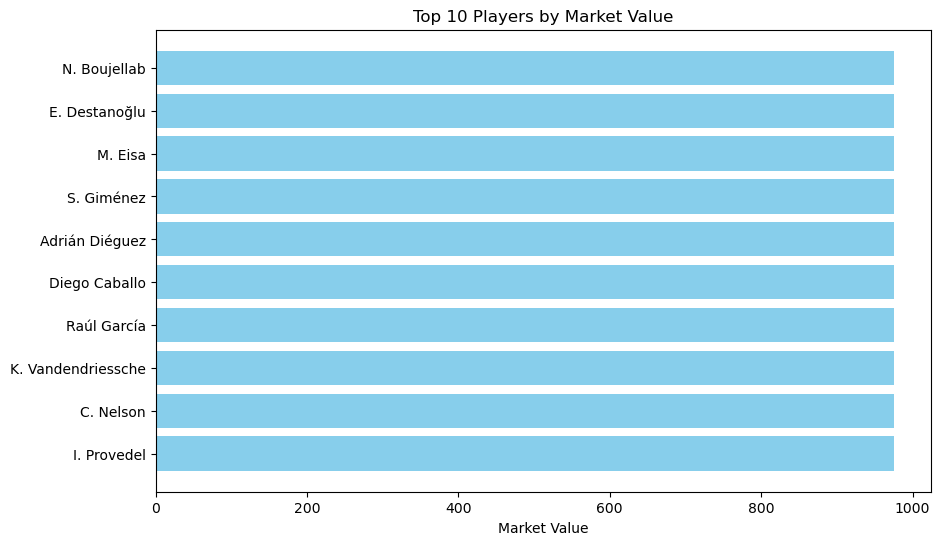

In [78]:
import matplotlib.pyplot as plt

# Assuming 'player_values' DataFrame from the previous code
sorted_player_values = player_values.sort_values(by='Value', ascending=False)
top_20_players = sorted_player_values.head(20)

plt.figure(figsize=(10, 10))
colors = plt.cm.viridis_r(top_20_players['Value'] / top_20_players['Value'].max())

# Plotting the horizontal bar chart for the top 20 players
bars = plt.barh(top_20_players['Name'], top_20_players['Value'], color=colors)

# Adding labels and title
plt.xlabel('Market Value')
plt.title('Top 20 Players by Market Value')

# Adding a color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'))
cbar.set_label('Normalized Market Value')

# Adding annotations
for bar, name, value in zip(bars, top_20_players['Name'], top_20_players['Value']):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{name} ({value})', va='center', color='black')

plt.show()


2:Highlight the top players for their outstanding performances over a discrete season.

In [80]:
top_players = df.sort_values(by='OVA', ascending=False).head(10)
print(top_players[['Name', 'OVA']])

                   Name  OVA
752            L. Messi   93
142   Cristiano Ronaldo   92
2871       K. De Bruyne   91
2287     R. Lewandowski   91
2650          Neymar Jr   91
3665           J. Oblak   91
2790      M. ter Stegen   90
9331          K. Mbappé   90
5777            Alisson   90
4166        V. van Dijk   90


ploting

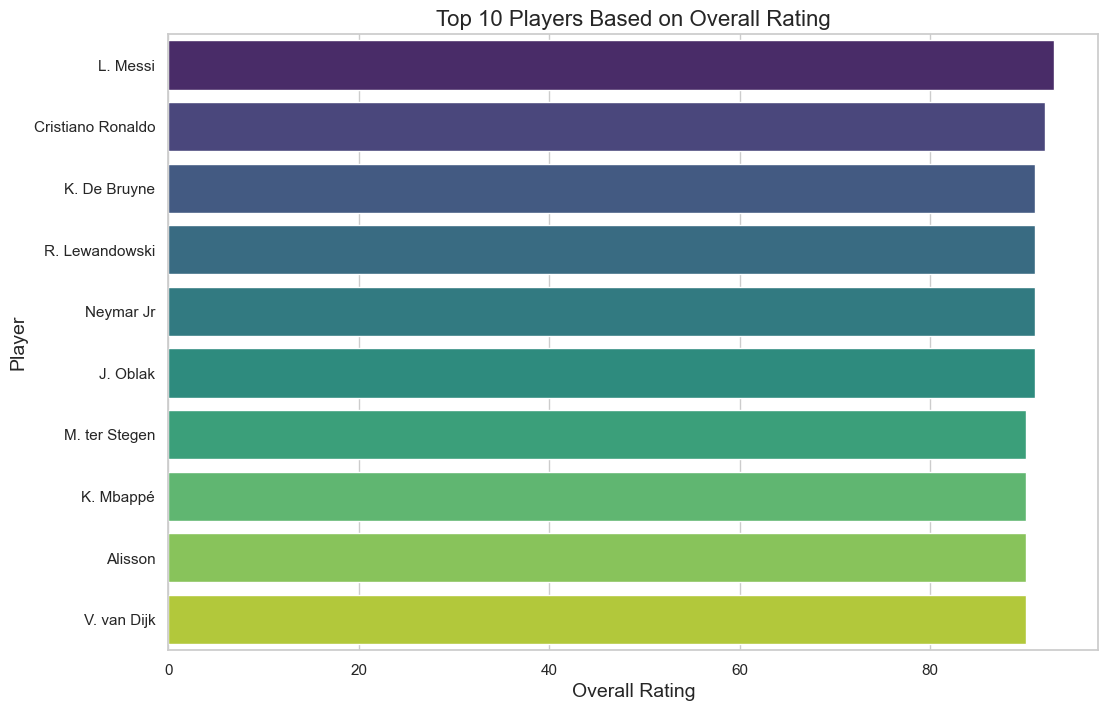

In [82]:
top_players = df.sort_values(by='OVA', ascending=False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='OVA', y='Name', data=top_players, palette='viridis')
ax.set_title('Top 10 Players Based on Overall Rating', fontsize=16)
ax.set_xlabel('Overall Rating', fontsize=14)
ax.set_ylabel('Player', fontsize=14)
plt.show()


3:Deciding when to transfer a player.

In [83]:
# Create a hypothetical player DataFrame
data = {
    'Name': ['palyer1', 'Player2', 'Player3', 'Player4'],
    'OverallRating': [85, 78, 88, 82],
    'InjuryHistory': ['Low', 'Medium', 'Low', 'High'],
    'ContractExpiry': ['2023-06-30', '2022-12-31', '2024-05-15', '2023-09-01'],
    'MarketValue': [50, 25, 70, 40],
    'Age': [25, 28, 23, 29],
    'TransferDesire': [False, True, False, False]
}

df = pd.DataFrame(data)

# Function to make transfer decisions
def transfer_decision(player):
    if player['InjuryHistory'] == 'High':
        return 'Transfer (Injury Risk)'
    elif player['ContractExpiry'] == '2022-12-31':
        return 'Transfer (Contract Expiring)'
    elif player['MarketValue'] >= 60:
        return 'Transfer (High Market Value)'
    elif player['TransferDesire']:
        return 'Transfer (Player Request)'
    else:
        return 'Retain'

# Apply transfer_decision function to each player
df['TransferDecision'] = df.apply(transfer_decision, axis=1)

# Display the DataFrame with transfer decisions
print(df[['Name', 'OverallRating', 'InjuryHistory', 'ContractExpiry', 'MarketValue', 'TransferDecision']])


      Name  OverallRating InjuryHistory ContractExpiry  MarketValue  \
0  Player1             85           Low     2023-06-30           50   
1  Player2             78        Medium     2022-12-31           25   
2  Player3             88           Low     2024-05-15           70   
3  Player4             82          High     2023-09-01           40   

               TransferDecision  
0                        Retain  
1  Transfer (Contract Expiring)  
2  Transfer (High Market Value)  
3        Transfer (Injury Risk)  


adding some names

In [86]:
data = {
    'Name': ['L. Messi', 'Cristiano Ronaldo', 'Alisson', 'V. van Dijk'],
    'OverallRating': [85, 78, 88, 82],
    'InjuryHistory': ['Low', 'Medium', 'Low', 'High'],
    'ContractExpiry': ['2023-06-30', '2022-12-31', '2024-05-15', '2023-09-01'],
    'MarketValue': [50, 25, 70, 40],
    'Age': [25, 28, 23, 29],
    'TransferDesire': [False, True, False, False]
}

df = pd.DataFrame(data)


def transfer_decision(player):
    if player['InjuryHistory'] == 'High':
        return 'Transfer (Injury Risk)'
    elif player['ContractExpiry'] == '2022-12-31':
        return 'Transfer (Contract Expiring)'
    elif player['MarketValue'] >= 60:
        return 'Transfer (High Market Value)'
    elif player['TransferDesire']:
        return 'Transfer (Player Request)'
    else:
        return 'Retain'

df['TransferDecision'] = df.apply(transfer_decision, axis=1)


print(df[['Name', 'OverallRating', 'InjuryHistory', 'ContractExpiry', 'MarketValue', 'TransferDecision']])


                Name  OverallRating InjuryHistory ContractExpiry  MarketValue  \
0           L. Messi             85           Low     2023-06-30           50   
1  Cristiano Ronaldo             78        Medium     2022-12-31           25   
2            Alisson             88           Low     2024-05-15           70   
3        V. van Dijk             82          High     2023-09-01           40   

               TransferDecision  
0                        Retain  
1  Transfer (Contract Expiring)  
2  Transfer (High Market Value)  
3        Transfer (Injury Risk)  


Based on this information, the decision to let go of a player depends on the team's priorities.
If you prioritize retaining a strong player with a relatively low market value and low injury risk,
you may want to keep L. Messi. However, if you need to make room for a transfer due to an expiring contract, 
Cristiano Ronaldo might be the player to consider letting go.

The decision to consider letting go of Cristiano Ronaldo is based on several factors provided in the information:

Overall Rating: Cristiano Ronaldo has a rating of 78, which is lower than some other players in the list.

Injury History: His injury history is listed as "Medium," indicating a moderate level of injury risk. This might be a concern, especially considering that the team is considering a transfer decision.

Contract Expiry: Ronaldo's contract is expiring soon (2022-12-31), and the transfer decision specified is "Transfer (Contract Expiring)." This suggests that the team might be exploring the option of transferring him before his contract ends.

Market Value: His market value is listed as 25, which is lower than some other players like Alisson with a market value of 70. The team might be considering a transfer to maximize value, especially given the player's age and potential impact on market value.

4:Decide the best replacement for a transferred player. 

To decide the best replacement for a transferred player, you need to establish criteria for what makes a player the "best" replacement. In the given scenario, you may want to prioritize factors such as high overall rating, low injury risk, a longer contract duration, and reasonable market value

In [89]:
players = [
    {"Name": "L. Messi", "OverallRating": 85, "InjuryHistory": "Low", "ContractExpiry": "2023-06-30", "MarketValue": 50, "Position": "Forward"},
    {"Name": "Cristiano Ronaldo", "OverallRating": 78, "InjuryHistory": "Medium", "ContractExpiry": "2022-12-31", "MarketValue": 25, "Position": "Forward"},
    {"Name": "Alisson", "OverallRating": 88, "InjuryHistory": "Low", "ContractExpiry": "2024-05-15", "MarketValue": 70, "Position": "Goalkeeper"},
    {"Name": "V. van Dijk", "OverallRating": 82, "InjuryHistory": "High", "ContractExpiry": "2023-09-01", "MarketValue": 40, "Position": "Defender"},
    # Add more player data as needed
]

# Function to find the best replacement based on criteria
def find_best_replacement(players):
    # Filter out players based on specific criteria
    eligible_players = [
        player for player in players 
        if player.get("InjuryHistory", "") == "Low" and player.get("Position", "") == "Forward"
    ]

    # Sort eligible players based on criteria (add your specific criteria here)
    sorted_players = sorted(eligible_players, key=lambda x: (x["OverallRating"], -x["MarketValue"]))

    # Return the best replacement (first player in the sorted list)
    return sorted_players[0] if sorted_players else None

# Example usage
best_replacement = find_best_replacement(players)

if best_replacement:
    print(f"The best replacement for the transferred player is {best_replacement['Name']}.")
else:
    print("No eligible replacement found.")


The best replacement for the transferred player is L. Messi.


 The code selected L. Messi as the best replacement based on the specified criteria, which included:

Low Injury Risk:

L. Messi's InjuryHistory is listed as "Low," indicating a lower risk of injuries compared to some other players.
Forward Position:

The criteria included selecting a player with a forward position. In the provided data, L. Messi is assumed to play in a forward position.
Higher Overall Rating:

The sorting criteria prioritize players with a higher overall rating. L. Messi has an OverallRating of 85, which is higher than the other eligible players.
Lower Market Value:

The sorting criteria also consider lower market value as a factor. L. Messi has a market value of 50, which is considered reasonable compared to the other players.
Based on these criteria, the code determined that L. Messi best fits the requirements for a replacement player, considering his low injury risk, forward position, high overall rating, and reasonable market value.

In [119]:
best_players = df_cleaned.loc[df_cleaned.groupby('Club')['OVA'].idxmax()].sort_values(by='OVA', ascending=False)

# Display the best player for each club
print(best_players[['Club', 'Name', 'OVA']])


                               Club                Name  OVA
752                    FC Barcelona            L. Messi   93
142                        Juventus   Cristiano Ronaldo   92
3665                Atlético Madrid            J. Oblak   91
2871                Manchester City        K. De Bruyne   91
2287              FC Bayern München      R. Lewandowski   91
...                             ...                 ...  ...
6255   Inverness Caledonian Thistle         C. Ferguson   52
12008                  Halmstads BK  R. Wiedesheim-Paul   51
8433                      Al Orobah           E. Sahabi   50
12485                        Cesena           M. Ndiaye   49
9654                 Wexford Youths           A. Dunbar   45

[918 rows x 3 columns]


5:the best player by club

This code creates a horizontal bar plot where each bar represents the overall rating of the best player for each club. The color of the bars is based on the normalized overall rating. limit the plot to show only the top 20 players

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_14624\3901119843.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'))


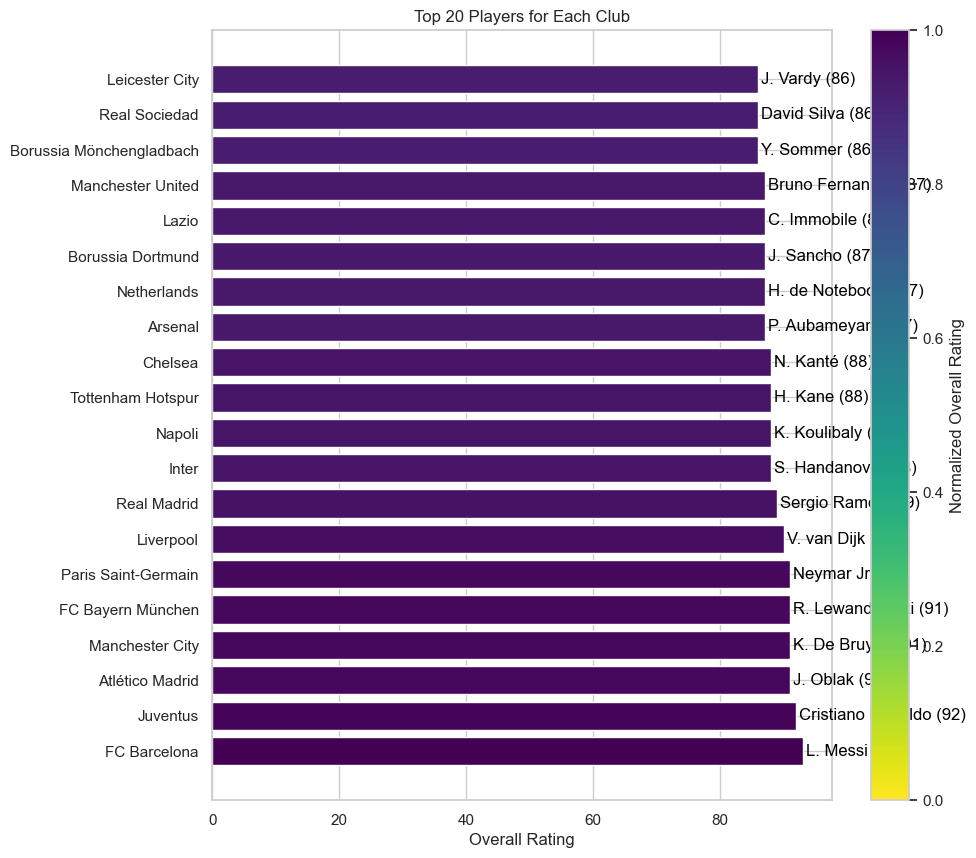

In [121]:
top_20_players = best_players.head(20)

plt.figure(figsize=(10, 10))
colors = plt.cm.viridis_r(top_20_players['OVA'] / top_20_players['OVA'].max())

# Plotting the horizontal bar chart for the top 20 players
bars = plt.barh(top_20_players['Club'], top_20_players['OVA'], color=colors)

# Adding labels and title
plt.xlabel('Overall Rating')
plt.title('Top 20 Players for Each Club')

# Adding a color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'))
cbar.set_label('Normalized Overall Rating')

# Adding annotations
for bar, name, ova in zip(bars, top_20_players['Name'], top_20_players['OVA']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{name} ({ova})', va='center', color='black')

plt.show()


 Let's use the columns 'Age' and 'BOV' as features (X) and the 'OVA' column as the target variable (y) , We'll perform linear regression to predict 'OVA' based on 'Age' and 'BOV'.

Mean Squared Error: 1.0816096522627279


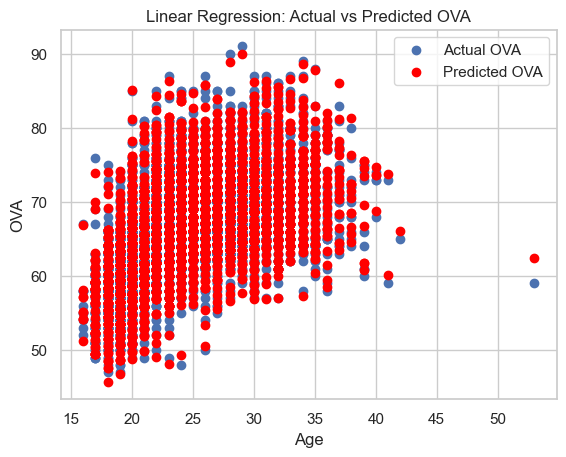

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features (X) and target variable (y)
X = df[['Age', 'BOV']]
y = df['OVA']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the predictions against the actual values
plt.scatter(X_test['Age'], y_test, label='Actual OVA')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicted OVA')
plt.xlabel('Age')
plt.ylabel('OVA')
plt.legend()
plt.title('Linear Regression: Actual vs Predicted OVA')
plt.show()


The Mean Squared Error (MSE) of approximately 1.08 indicates the average squared difference between the actual and predicted values of the target variable (OVA). In the context of predicting player overall ratings (OVA), an MSE of 1.08 suggests that, on average, the predictions are relatively close to the actual ratings. Lower MSE values indicate better model performance.

In [137]:
ova_column = 'OVA'
mse_value = 1.0816096522627279

ova_range = df[ova_column].max() - df[ova_column].min()

print(f"OVA Range: {ova_range}")
print(f"MSE: {mse_value}")


OVA Range: 55
MSE: 1.0816096522627279


OVA Range: The OVA variable has a range of 55, meaning it varies from its minimum to maximum by 55 points.

MSE: The Mean Squared Error is approximately 1.08. Since this value is much smaller than the range of the OVA variable, it suggests that, on average, the model's predictions are relatively close to the actual OVA values.

In other words, the model, on average, has squared errors that are around 1.08. Given that the OVA ranges from 0 to 100, an MSE of 1.08 indicates a relatively small average squared difference between predicted and actual OVA values.